In [107]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import STL, MSTL

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (10, 8)

In [108]:
df = pd.read_csv('../data/point_M634_ts.csv', index_col=0, parse_dates=True)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 661 entries, 2021-01-01 to 2022-10-23
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   num_of_buyers            661 non-null    int64
 1   is_pre_holiday           661 non-null    int64
 2   is_common_holiday        661 non-null    int64
 3   is_working_day           661 non-null    int64
 4   is_dayoff                661 non-null    int64
 5   is_limited_alcohol_sale  661 non-null    int64
 6   is_local_holiday         661 non-null    int64
dtypes: int64(7)
memory usage: 41.3 KB


Text(0, 0.5, 'Buyers')

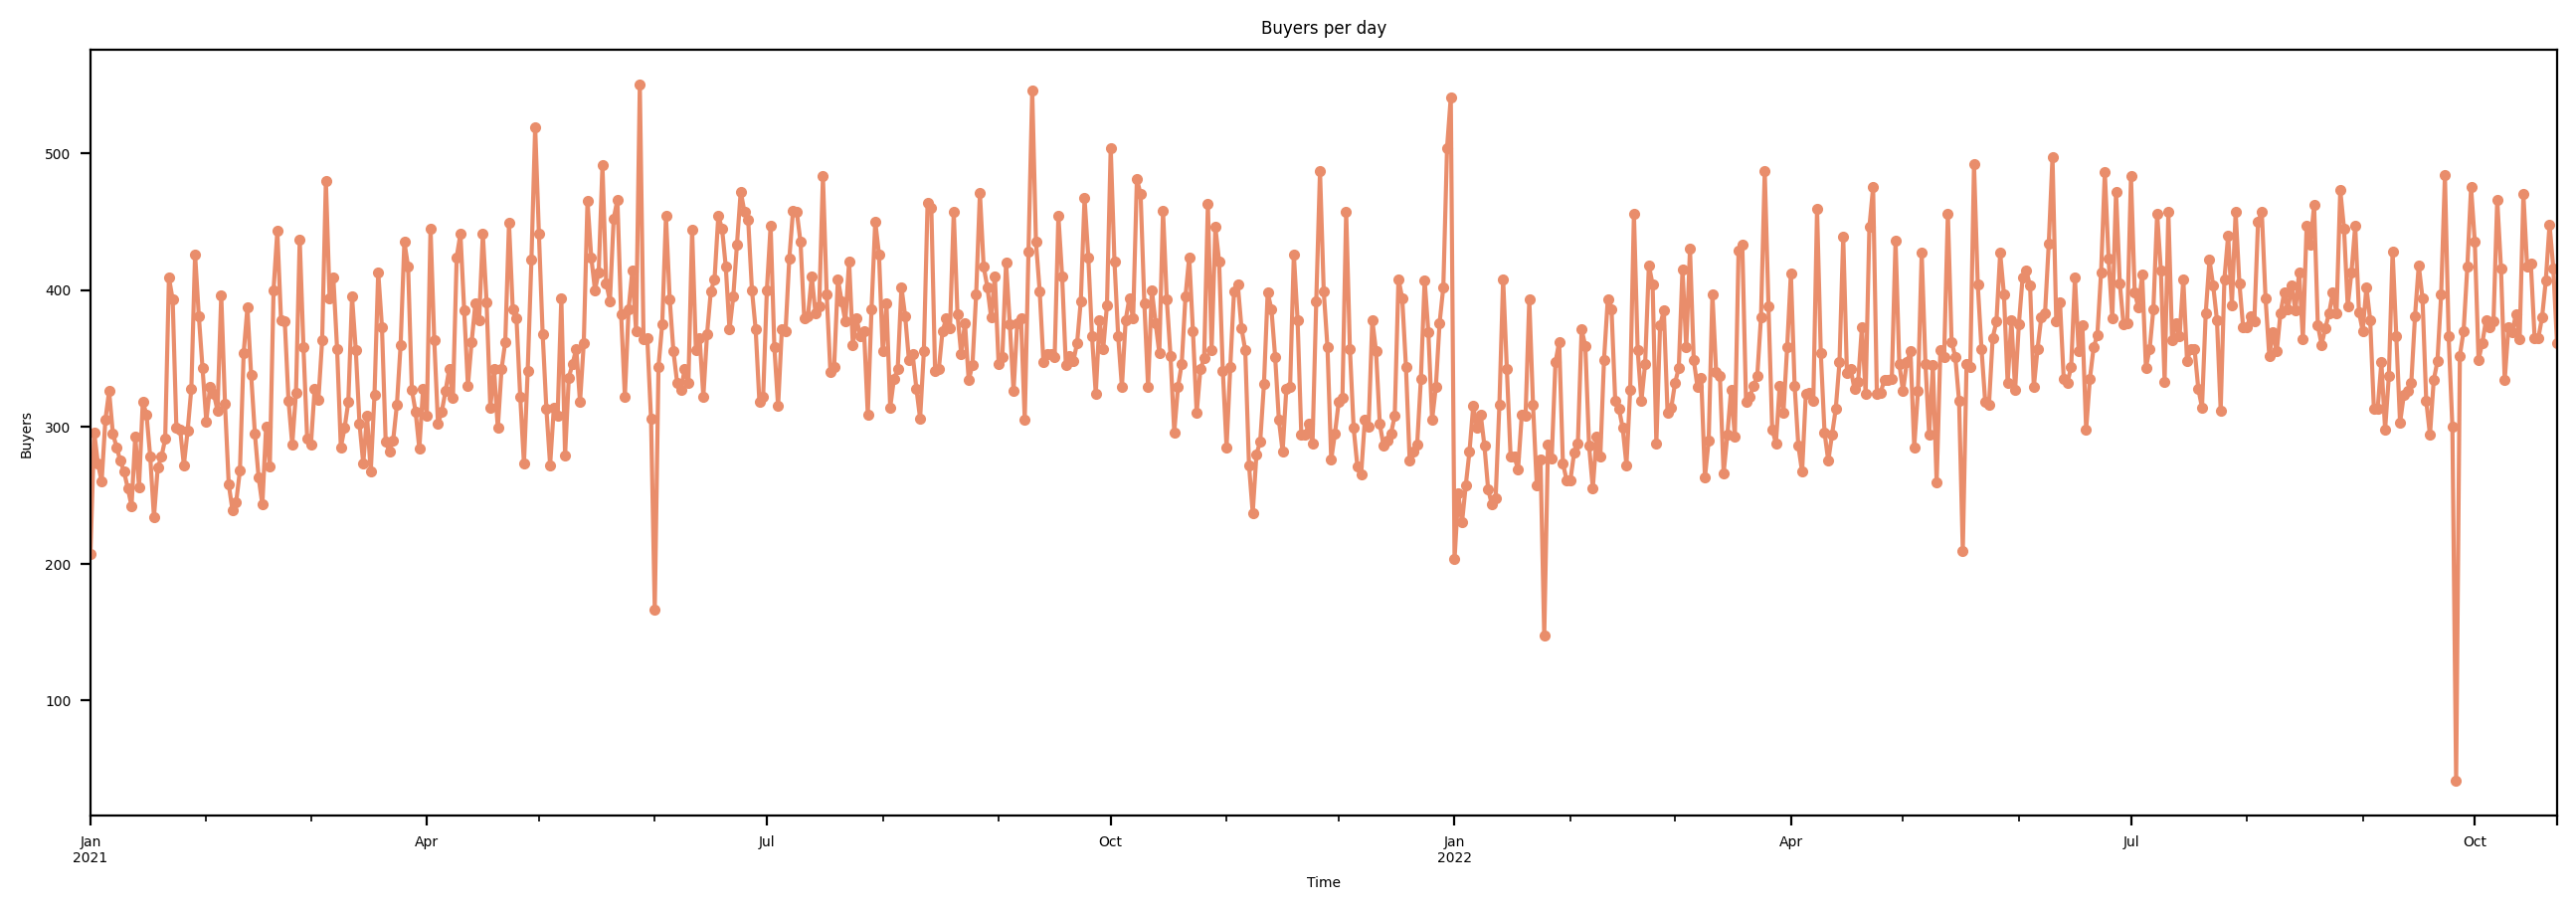

In [110]:
ax = df['num_of_buyers'].plot(marker=".", figsize=[16, 5])
ax.set_title("Buyers per day")
ax.set_xlabel("Time")
ax.set_ylabel("Buyers")

Text(0, 0.5, 'Buyers')

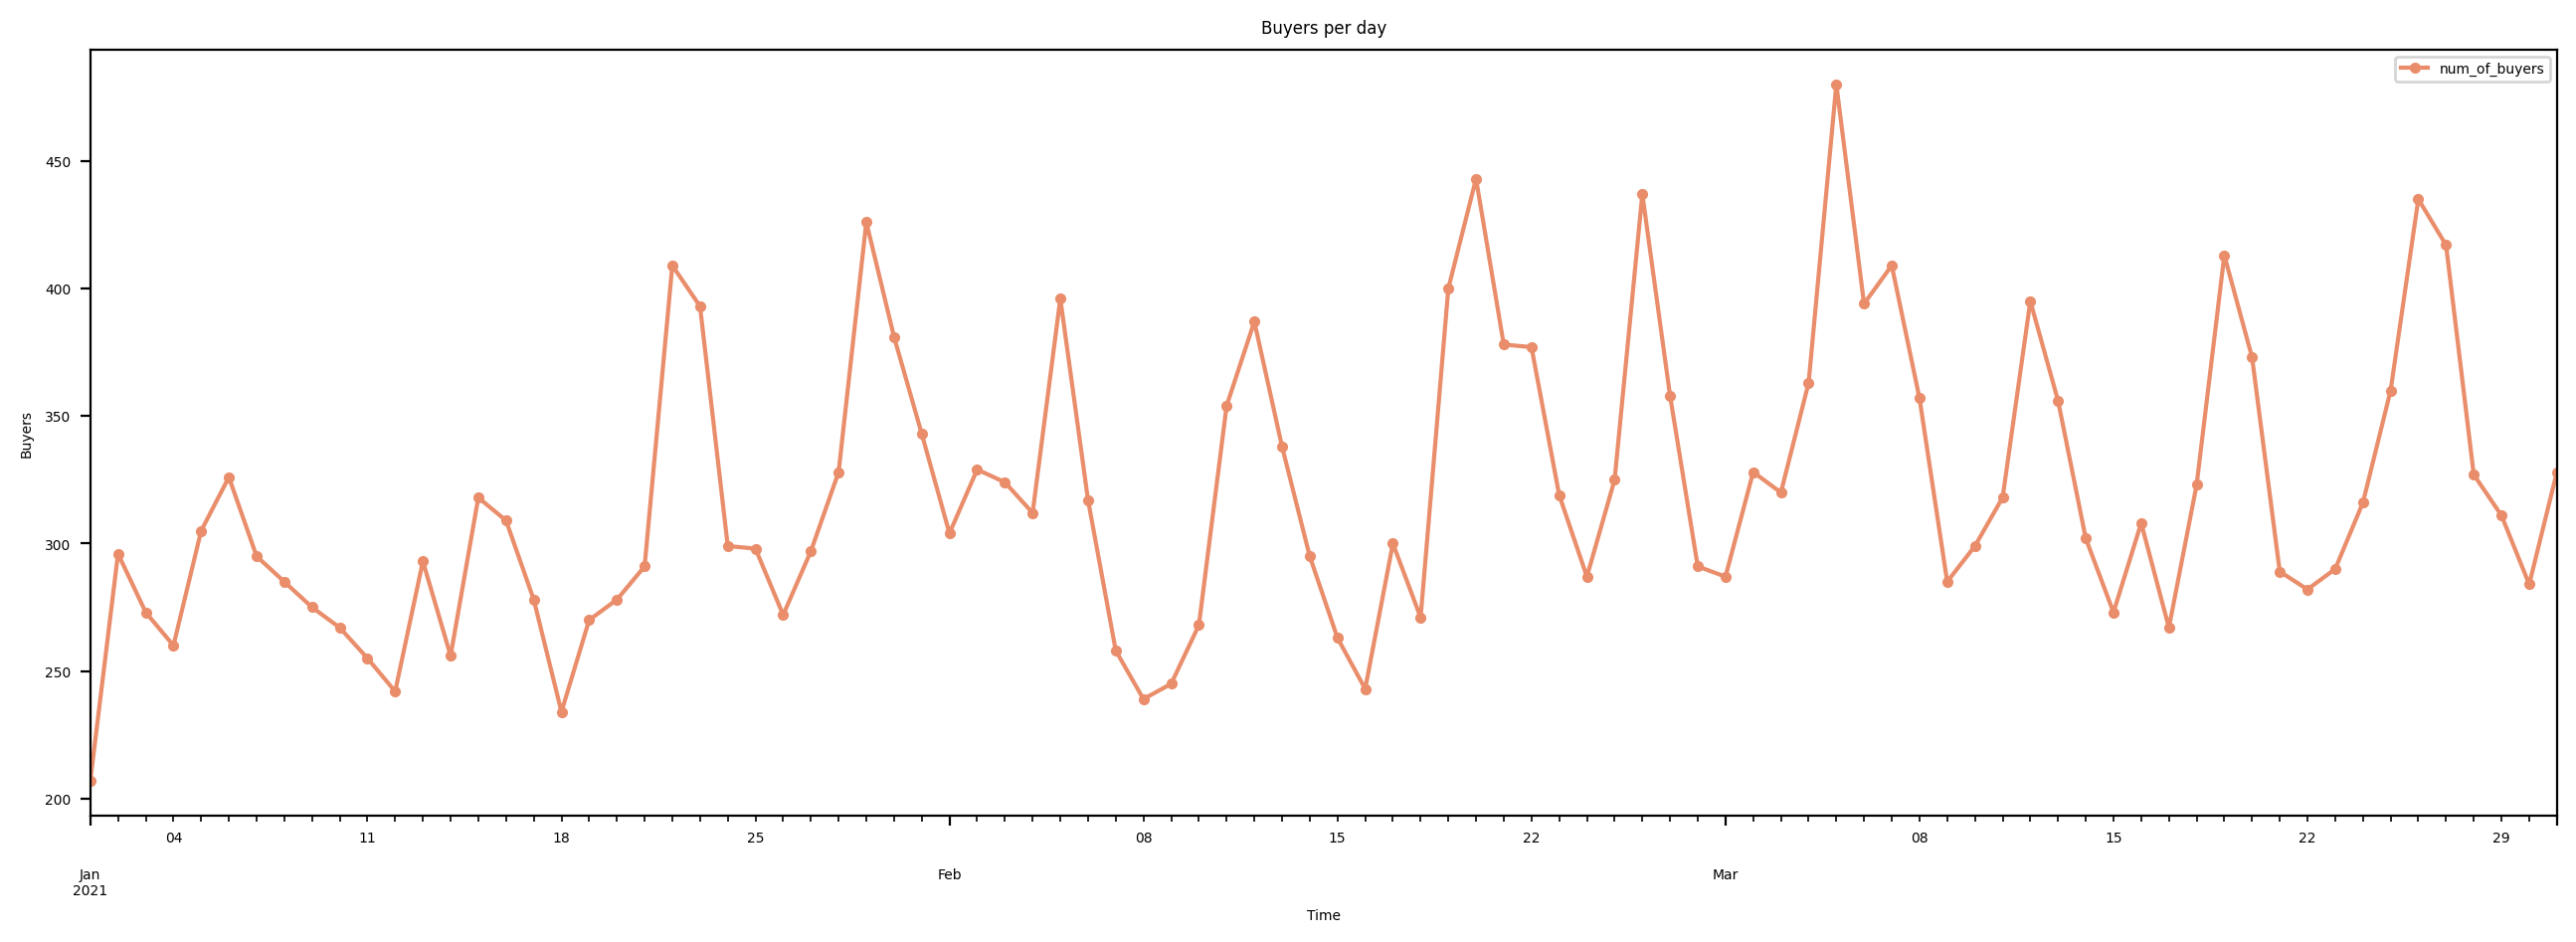

In [111]:
ax = df[['num_of_buyers']].iloc[0:90].plot(marker=".", figsize=[16, 5]);
ax.set_title("Buyers per day")
ax.set_xlabel("Time")
ax.set_ylabel("Buyers")

Недельная сезонность определенно присутствует

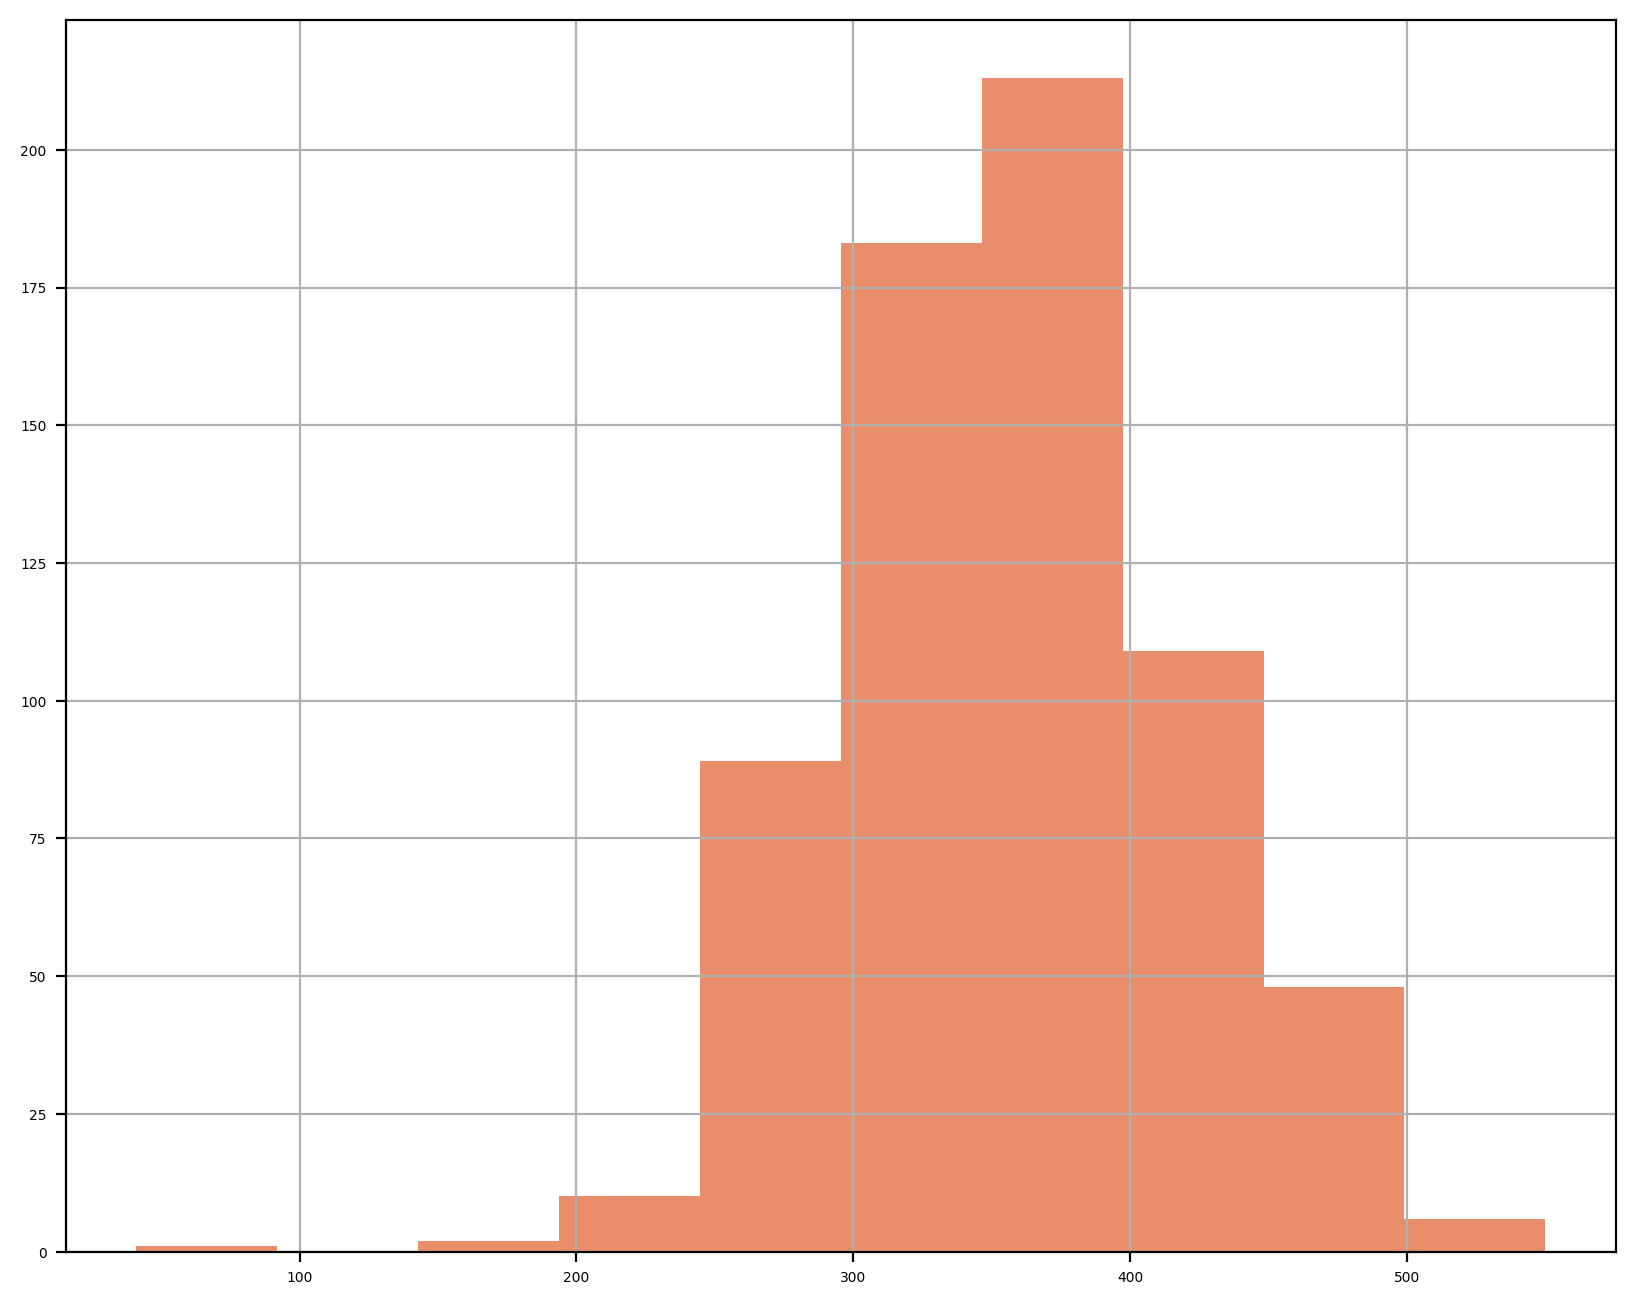

In [112]:
df['num_of_buyers'].hist();

Распределение немного перекошено, длинный левый хвост.
Необходимо подумать об обработке.

### Декомпозиция по STL

In [113]:
# Perform STL decomposition
res = STL(
    endog=df["num_of_buyers"],  # Y values
    seasonal=29,  # Determines the window size for LOESS used
    period=30,  # The periodicity of the seasonal component
    # when smoothing the seasonal component
    # (i.e, the cycle-subseries)
    robust=True  # Flag to use robust regression when
    # fitting the LOESS curves so the fit
    # is robust to outliers
).fit()

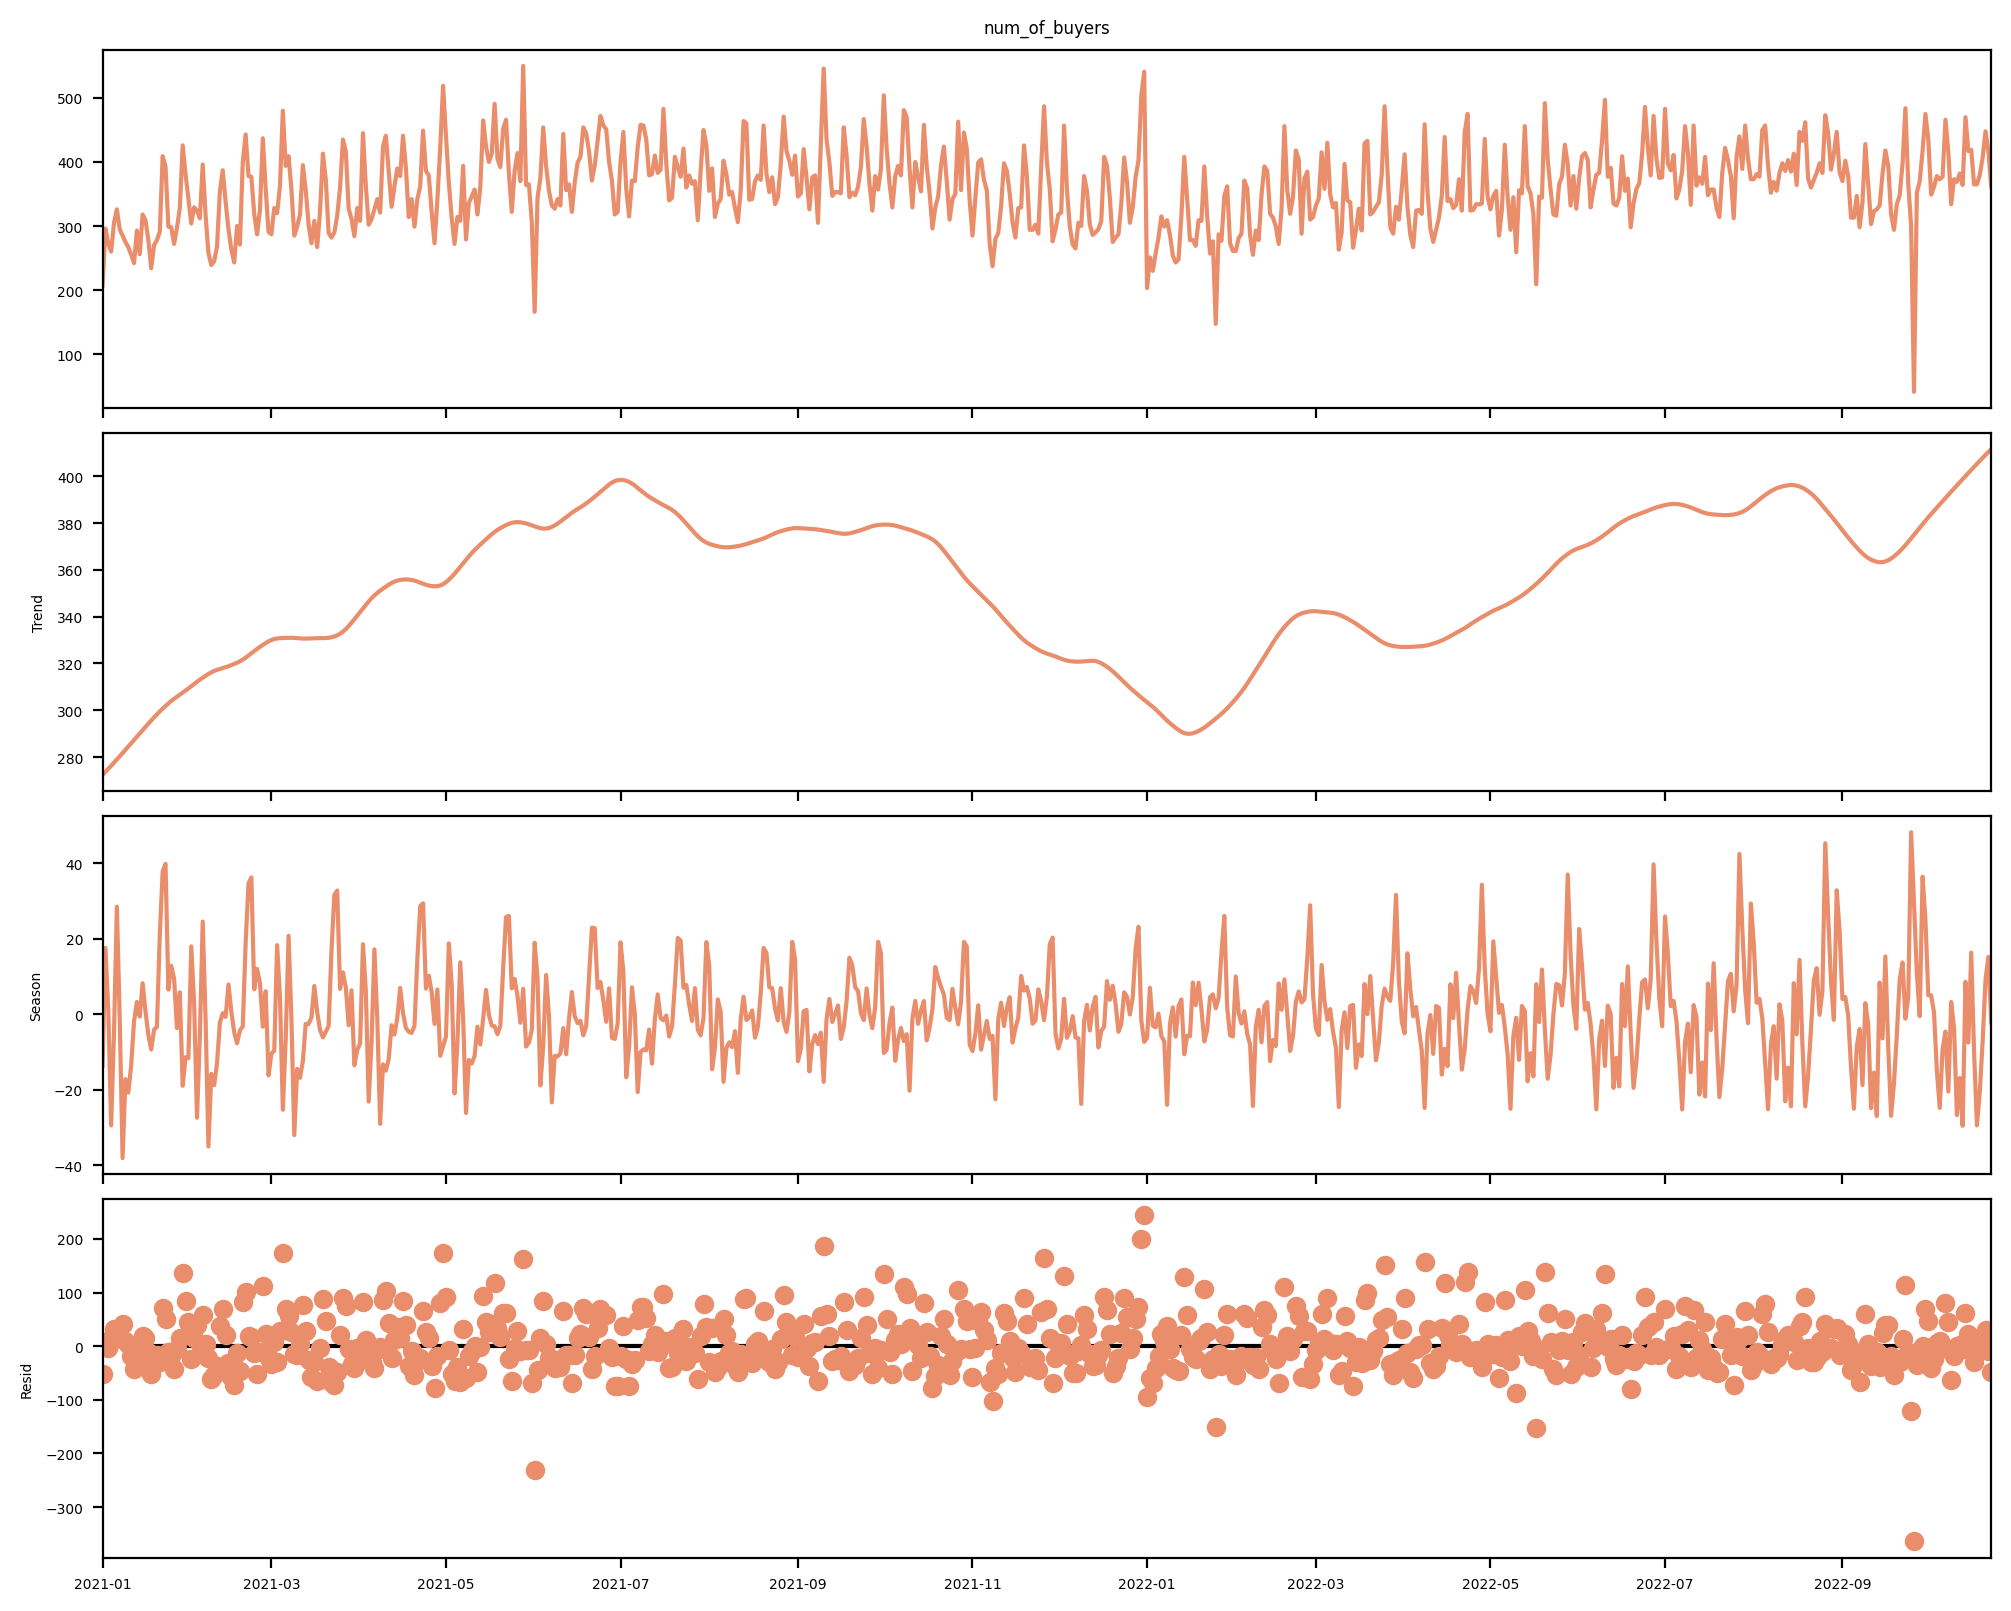

In [114]:
res.plot();

In [115]:
res = MSTL(df["num_of_buyers"], periods=(7, 7 * 4, 7 * 4 * 3)).fit()

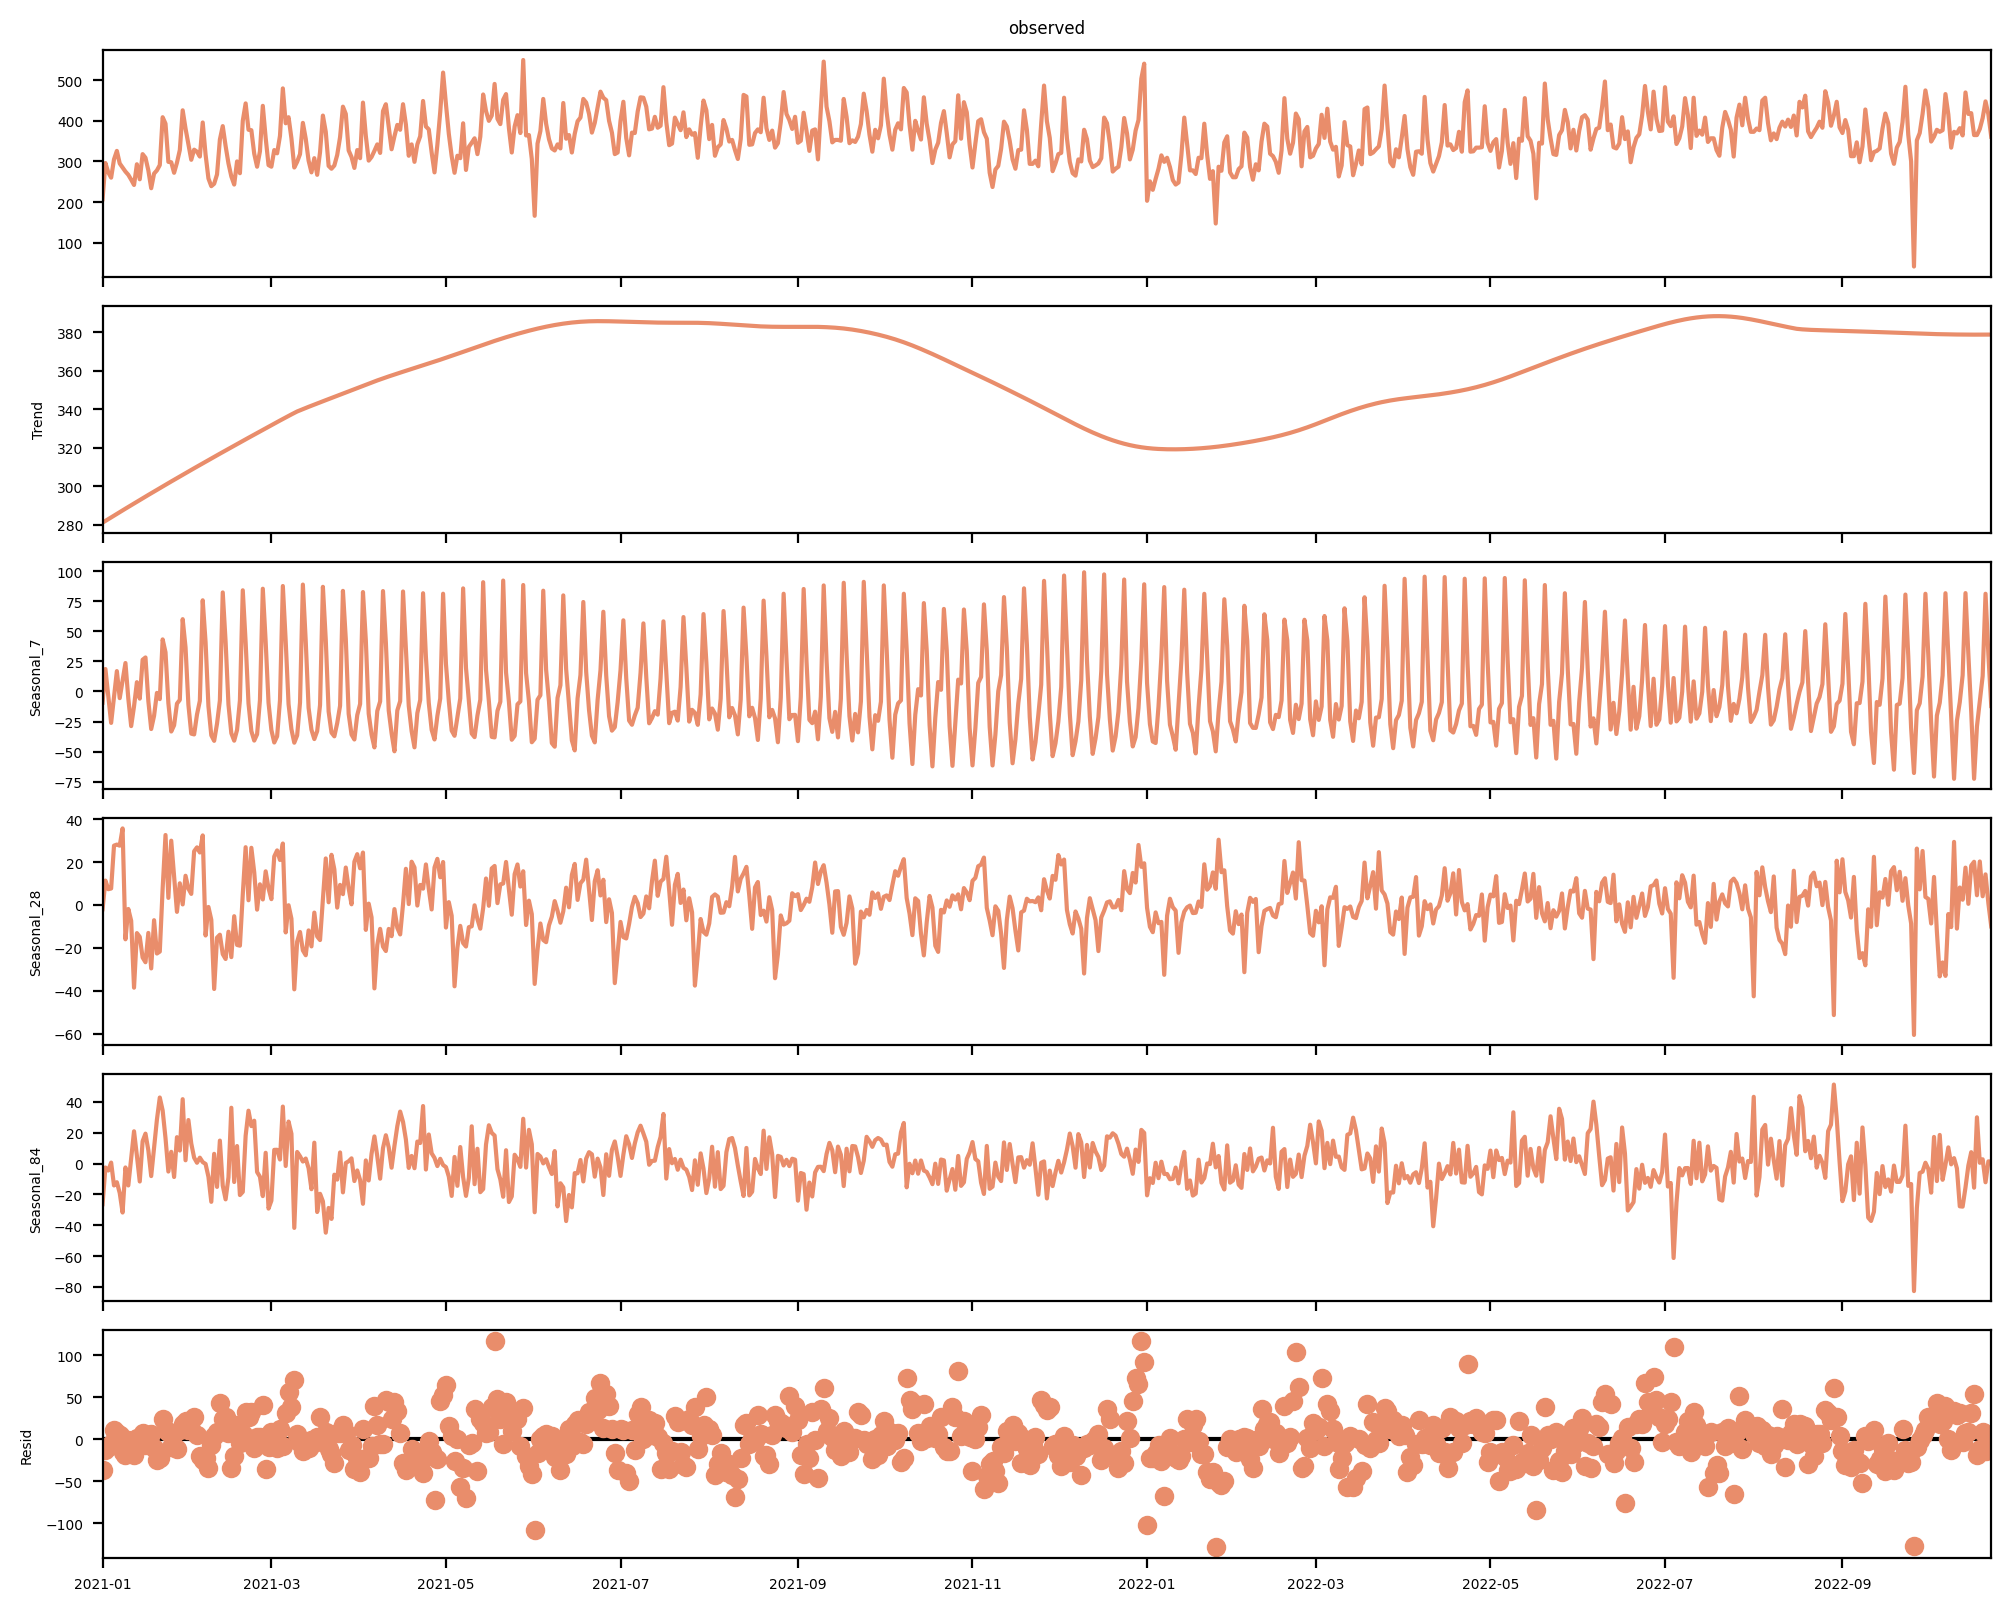

In [116]:
res.plot();

Декомпозиция с мультисезонностью выглядит лучше, остатки колеблются в более узком диапазоне